In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#importing data
df = pd.read_excel('Data_Extract_From_Enterprise_Surveys.xlsx')

In [3]:
#checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16795 entries, 0 to 16794
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   16792 non-null  object
 1   Country Code   16790 non-null  object
 2   Series Name    16790 non-null  object
 3   Series Code    16790 non-null  object
 4   2006 [YR2006]  16790 non-null  object
 5   2007 [YR2007]  16790 non-null  object
 6   2008 [YR2008]  16790 non-null  object
 7   2009 [YR2009]  16790 non-null  object
 8   2010 [YR2010]  16790 non-null  object
 9   2011 [YR2011]  16790 non-null  object
 10  2012 [YR2012]  16790 non-null  object
 11  2013 [YR2013]  16790 non-null  object
 12  2014 [YR2014]  16790 non-null  object
 13  2015 [YR2015]  16790 non-null  object
 14  2016 [YR2016]  16790 non-null  object
 15  2017 [YR2017]  16790 non-null  object
 16  2018 [YR2018]  16790 non-null  object
 17  2019 [YR2019]  16790 non-null  object
 18  2020 [YR2020]  16790 non-n

In [4]:
#checking data
df.head()

Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                         Series Name            Series Code  \
0                   Age of the establishment (years)      IC.FRM.FCHAR.CAR1   
1                       Annual employment growth (%)  IC.FRM.EMP.GROW.PEFT2   
2  Bribery depth (% of public transactions where ...     IC.FRM.BRIB.GRAFT2   
3  Bribery incidence (percent of firms experienci...     IC.FRM.BRIB.GRAFT3   
4                           Capacity utilization (%)        IC.FRM.INNOV.T3   

  2006 [YR2006] 2007 [YR2007] 2008 [YR2008] 2009 [YR2009] 2010 [YR2010]  \
0            ..            ..           7.1            ..            ..   
1            ..            ..          13.3            ..            ..   
2            ..            ..          24.8            ..            ..   
3            ..            ..          36.7            ..            ..   
4            ..            ..          78.4            ..            ..   

  2011 [YR2011] 2012 [YR2012] 2013 [YR2013] 2014 [YR2014] 2015 [YR2015]  \
0            ..            ..            ..           9.5            ..   
1            ..            ..            ..           6.9            ..   
2            ..            ..            ..          34.6            ..   
3            ..            ..            ..          46.8            ..   
4            ..            ..            ..          80.7            ..   

  2016 [YR2016] 2017 [YR2017] 2018 [YR2018] 2019 [YR2019] 2020 [YR2020]  
0            ..            ..            ..            ..            ..  
1            ..            ..            ..            ..            ..  
2            ..            ..            ..            ..            ..  
3            ..            ..            ..            ..            ..  
4            ..            ..            ..            ..            ..

In [5]:
#turing year columns into rows
df = pd.melt(df, id_vars=['Country Name','Country Code','Series Name'], value_vars=df.columns[4:])

In [6]:
df.head()

Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                         Series Name       variable value  
0                   Age of the establishment (years)  2006 [YR2006]    ..  
1                       Annual employment growth (%)  2006 [YR2006]    ..  
2  Bribery depth (% of public transactions where ...  2006 [YR2006]    ..  
3  Bribery incidence (percent of firms experienci...  2006 [YR2006]    ..  
4                           Capacity utilization (%)  2006 [YR2006]    ..

In [7]:
#checking country values
df['Country Name'].value_counts()

Cambodia                                  1725
Poland                                    1725
Suriname                                  1725
South Sudan                               1725
Egypt, Arab Rep.                          1725
                                          ... 
Zimbabwe                                  1725
Indonesia                                 1725
Fiji                                      1725
Last Updated: 04/02/2021                    15
Data from database: Enterprise Surveys      15
Name: Country Name, Length: 148, dtype: int64

In [8]:
#checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251925 entries, 0 to 251924
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Country Name  251880 non-null  object
 1   Country Code  251850 non-null  object
 2   Series Name   251850 non-null  object
 3   variable      251925 non-null  object
 4   value         251850 non-null  object
dtypes: object(5)
memory usage: 9.6+ MB


In [9]:
#replacing ".." with nan values
df.value = df.value.apply(lambda x: np.NaN if x == ".." else x)

In [10]:
#checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251925 entries, 0 to 251924
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country Name  251880 non-null  object 
 1   Country Code  251850 non-null  object 
 2   Series Name   251850 non-null  object 
 3   variable      251925 non-null  object 
 4   value         32362 non-null   float64
dtypes: float64(1), object(4)
memory usage: 9.6+ MB


In [11]:
#eliminating unbalancing between Series Name and Country code
df = df[pd.isna(df['Country Code'])==False]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251850 entries, 0 to 251919
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country Name  251850 non-null  object 
 1   Country Code  251850 non-null  object 
 2   Series Name   251850 non-null  object 
 3   variable      251850 non-null  object 
 4   value         32362 non-null   float64
dtypes: float64(1), object(4)
memory usage: 11.5+ MB


In [13]:
#index columns for pivot table
df.drop('Series Name',1).columns[:3]

Index(['Country Name', 'Country Code', 'variable'], dtype='object')

In [14]:
#all columns
df.columns

Index(['Country Name', 'Country Code', 'Series Name', 'variable', 'value'], dtype='object')

In [15]:
#pivotting data frame
df = pd.pivot_table(df, values='value',index=['Country Name', 'Country Code', 'variable'],
               columns='Series Name', dropna=True ).reset_index().rename_axis(None, axis=1)

In [16]:
#the number of columns having more than one observation
(df['Country Name'].value_counts() > 1).sum()

98

In [17]:
#eliminating those countries with more than one observation
df_c = df.copy()
for i in set(df['Country Name'].values):
    num = len(df[df['Country Name']==i])
    if num > 1:
        df_c = df_c[df_c['Country Name'] != i]
        d = df[df['Country Name']==i].tail(1)
        df_c = pd.concat([df_c, d])
        

In [18]:
df_c

Country Name Country Code       variable  \
7       Antigua and Barbuda          ATG  2010 [YR2010]   
17             Bahamas, The          BHS  2010 [YR2010]   
20                 Barbados          BRB  2010 [YR2010]   
24                  Belgium          BEL  2020 [YR2020]   
25                   Belize          BLZ  2010 [YR2010]   
..                      ...          ...            ...   
155               Lithuania          LTU  2019 [YR2019]   
35   Bosnia and Herzegovina          BIH  2019 [YR2019]   
69                  Croatia          HRV  2019 [YR2019]   
188                 Namibia          NAM  2014 [YR2014]   
190                   Nepal          NPL  2013 [YR2013]   

     Age of the establishment (years)  Annual employment growth (%)  \
7                                17.1                           4.5   
17                               24.2                           4.9   
20                               15.0                           4.0   
24                               33.2                           3.8   
25                               17.2                           2.9   
..                                ...                           ...   
155                              16.5                           0.3   
35                               20.2                           2.8   
69                               21.2                           2.1   
188                               9.7                           9.6   
190                              14.2                           5.5   

     Bribery depth (% of public transactions where a gift or informal payment was requested)  \
7                                                  6.4                                         
17                                                14.8                                         
20                                                 1.1                                         
24                                                 3.1                                         
25                                                 6.2                                         
..                                                 ...                                         
155                                                0.1                                         
35                                                11.9                                         
69                                                 7.3                                         
188                                                6.3                                         
190                                               10.9                                         

     Bribery incidence (percent of firms experiencing at least one bribe payment request)  \
7                                                  6.9                                      
17                                                21.0                                      
20                                                 1.2                                      
24                                                 4.3                                      
25                                                 6.2                                      
..                                                 ...                                      
155                                                0.2                                      
35                                                16.0                                      
69                                                10.1                                      
188                                                9.1                                      
190                                               14.4                                      

     Capacity utilization (%)  Days to clear direct exports through customs  \
7                         NaN                                           6.4   
17                       

In [19]:
df = df_c.copy()

In [20]:
#dropping variable column since there is only one sample for each country
df.drop(columns=['variable'], inplace=True)

In [21]:
#reindexing dataframe regarding country names
df = df.sort_index().reset_index().drop('index',1)

In [22]:
df.head()

Country Name Country Code  Age of the establishment (years)  \
0          Afghanistan          AFG                               9.5   
1              Albania          ALB                              12.9   
2               Angola          AGO                              10.0   
3  Antigua and Barbuda          ATG                              17.1   
4            Argentina          ARG                              26.7   

   Annual employment growth (%)  \
0                           6.9   
1                           7.1   
2                          13.7   
3                           4.5   
4                          -0.7   

   Bribery depth (% of public transactions where a gift or informal payment was requested)  \
0                                               34.6                                         
1                                               30.0                                         
2                                               42.9                                         
3                                                6.4                                         
4                                                7.1                                         

   Bribery incidence (percent of firms experiencing at least one bribe payment request)  \
0                                               46.8                                      
1                                               36.1                                      
2                                               51.3                                      
3                                                6.9                                      
4                                                9.3                                      

   Capacity utilization (%)  Days to clear direct exports through customs  \
0                      80.7                                           8.1   
1                      78.8                                           1.1   
2                      62.9                                           6.7   
3                       NaN                                           6.4   
4                      66.5                                           6.5   

   Days to clear imports from customs  \
0                                10.6   
1                                 1.8   
2                                11.7   
3                                 NaN   
4                                19.3   

   Days to obtain a construction-related permit  ...  \
0                                         139.6  ...   
1                                          36.1  ...   
2                                          11.5  ...   
3                                           NaN  ...   
4                                         105.4  ...   

   Proportion of total inputs that are of foreign origin (%)  \
0                                               51.0           
1                                               58.1           
2                                               25.3           
3                                               20.8           
4                                               24.4           

   Proportion of total sales that are exported directly (%)  \
0                                                1.3          
1                                               10.1          
2                                                0.4          
3                                                7.0          
4                                                2.3          

   Proportion of workers offered formal training (%)  \
0                                               29.0   
1                                               42.2   
2                                               54.8   
3                                                NaN   
4                                               67.1   

   Proportion of working capital financed by banks (%)  \
0                                         

In [23]:
#corr table for "Bribery incidence..." column to select relevant columns for model
df.corr()['Bribery incidence (percent of firms experiencing at least one bribe payment request)'].\
    sort_values().head(50)

Percent of firms with a checking or savings account                                       -0.587138
Percent of firms using e-mail to interact with clients/suppliers                          -0.539225
Percent of firms with a bank loan/line of credit                                          -0.463914
Percent of firms having their own Web site                                                -0.463243
Percent of firms formally registered when they started operations in the country          -0.447914
Years of the top manager's experience working in the firm's sector                        -0.444033
Proportion of investment financed by banks (%)                                            -0.421922
Percent of firms using banks to finance investments                                       -0.388729
Percent of firms choosing inadequately educated workforce as their biggest obstacle       -0.376342
Percent of firms using banks to finance working capital                                   -0.360987


In [24]:
#corr table for "Bribery incidence..." column to select relevant columns for model
df.corr()['Bribery incidence (percent of firms experiencing at least one bribe payment request)'].\
    sort_values().tail(50)

Days to clear imports from customs                                                              0.153882
Percent of firms whose new product/service is also new to the main market                       0.156013
Percent of firms identifying tax administration as a major constraint                           0.157434
Proportion of temporary workers (out of all workers)                                            0.158969
Days to clear direct exports through customs                                                    0.178395
Percent of firms identifying crime, theft and disorder as a major constraint                    0.182629
Value of collateral needed for a loan (% of the loan amount)                                    0.209763
Percent of firms identifying electricity as a major constraint                                  0.211151
Proportion of loans requiring collateral (%)                                                    0.214356
Percent of firms identifying transportation as a major 

## According to corr table seleceted values are;

### If there were outages, average losses due to electrical outages (% of annual sales)  // Percent of firms owning or sharing a generator 

### If there were losses, average losses due to theft and vandalism (% of annual sales)

### Percent of firms visited or required to meet with tax officials

### Percent of firms with a checking or savings account // Proportion of investment financed by banks (%)

### Percent of firms using e-mail to interact with clients/suppliers // Percent of firms having their own Web site

### Years of the top manager's experience working in the firm's sector

### Proportion of permanent full-time non-production workers that are female (%)

In [25]:
model_list = ['Country Name','Country Code','If there were outages, average losses due to electrical outages (% of annual sales)',
             'If there were losses, average losses due to theft and vandalism (% of annual sales)',
             'Percent of firms visited or required to meet with tax officials',
             'Percent of firms with a checking or savings account',
             'Proportion of investment financed by banks (%)',
              'Percent of firms using e-mail to interact with clients/suppliers',
              'Percent of firms having their own Web site',
             "Years of the top manager's experience working in the firm's sector",
             "Proportion of permanent full-time non-production workers that are female (%)",
             "Bribery incidence (percent of firms experiencing at least one bribe payment request)",
             "Bribery depth (% of public transactions where a gift or informal payment was requested)",
             "Percent of firms expected to give gifts to secure government contract"]

In [26]:
#subseting the dataframe
df_m = df[model_list]

In [27]:
#renaming the columns
df_m.columns = ['Country Name','Country Code','electrical_outages','vandalism','meet_tax_officials',
                'with_saving_account','financed_by_banks','using_e-mail','own_web_site','manager_experience',
                'female_proportion','Bribery_incidence','Bribery_depth', 'secure_government_contract']

In [28]:
df_m.head()

Country Name Country Code  electrical_outages  vandalism  \
0          Afghanistan          AFG                 9.6       24.2   
1              Albania          ALB                 1.9        4.5   
2               Angola          AGO                12.6       12.4   
3  Antigua and Barbuda          ATG                 0.2        2.6   
4            Argentina          ARG                 0.8        1.8   

   meet_tax_officials  with_saving_account  financed_by_banks  using_e-mail  \
0                80.5                 43.7                1.5          64.9   
1                93.2                 91.2               12.6           NaN   
2                66.9                 86.4                5.2          38.1   
3                71.9                100.0               32.3          87.9   
4                41.1                 98.9               23.0          97.0   

   own_web_site  manager_experience  female_proportion  Bribery_incidence  \
0          21.8                13.4               47.2               46.8   
1          59.8                16.9               98.4               36.1   
2          28.9                11.2               58.5               51.3   
3          26.3                15.2                NaN                6.9   
4          69.3                26.6               40.1                9.3   

   Bribery_depth  secure_government_contract  
0           34.6                        46.9  
1           30.0                        15.3  
2           42.9                        64.0  
3            6.4                         0.0  
4            7.1                        12.9

In [29]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                146 non-null    object 
 1   Country Code                146 non-null    object 
 2   electrical_outages          145 non-null    float64
 3   vandalism                   141 non-null    float64
 4   meet_tax_officials          146 non-null    float64
 5   with_saving_account         145 non-null    float64
 6   financed_by_banks           146 non-null    float64
 7   using_e-mail                95 non-null     float64
 8   own_web_site                146 non-null    float64
 9   manager_experience          143 non-null    float64
 10  female_proportion           123 non-null    float64
 11  Bribery_incidence           146 non-null    float64
 12  Bribery_depth               146 non-null    float64
 13  secure_government_contract  145 non

In [30]:
#dropping "using_e-mail" columns since there are many missing values
df_m.drop('using_e-mail',1, inplace = True)

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                146 non-null    object 
 1   Country Code                146 non-null    object 
 2   electrical_outages          145 non-null    float64
 3   vandalism                   141 non-null    float64
 4   meet_tax_officials          146 non-null    float64
 5   with_saving_account         145 non-null    float64
 6   financed_by_banks           146 non-null    float64
 7   own_web_site                146 non-null    float64
 8   manager_experience          143 non-null    float64
 9   female_proportion           123 non-null    float64
 10  Bribery_incidence           146 non-null    float64
 11  Bribery_depth               146 non-null    float64
 12  secure_government_contract  145 non-null    float64
dtypes: float64(11), object(2)
memory us

In [32]:
#checking dataset where "female_proportion" column is nan
df_m[pd.isna(df_m.female_proportion)]

Country Name Country Code  electrical_outages  \
3               Antigua and Barbuda          ATG                 0.2   
7                      Bahamas, The          BHS                 1.5   
9                          Barbados          BRB                 0.2   
12                           Belize          BLZ                 0.1   
22                       Cabo Verde          CPV                 5.5   
25         Central African Republic          CAF                25.1   
31                      Congo, Rep.          COG                16.4   
38                         Dominica          DMA                 0.1   
43                          Eritrea          ERI                 0.2   
47                             Fiji          FJI                 4.9   
48                            Gabon          GAB                 1.7   
53                          Grenada          GRD                 1.0   
57                           Guyana          GUY                 2.8   
86            Micronesia, Fed. Sts.          FSM                 2.6   
101                Papua New Guinea          PNG                 4.7   
110                           Samoa          WSM                 6.6   
116                 Solomon Islands          SLB                 4.3   
120             St. Kitts and Nevis          KNA                 2.1   
121                       St. Lucia          LCA                 0.0   
122  St. Vincent and the Grenadines          VCT                 0.8   
128                        Thailand          THA                 4.1   
131                           Tonga          TON                 1.5   
139                         Vanuatu          VUT                 1.1   

     vandalism  meet_tax_officials  with_saving_account  financed_by_banks  \
3          2.6                71.9                100.0               32.3   
7          1.7                15.3                 97.6               11.7   
9          0.6                32.3                 97.4               12.8   
12         1.0                78.5                100.0               18.1   
22         3.9                68.9                 96.5               23.9   
25        12.0                89.8                 98.5                4.8   
31        16.9                91.9                 86.7                4.0   
38         NaN                63.0                100.0               22.1   
43         NaN                10.4                 98.2                1.2   
47         3.6                61.3                 96.1               30.9   
48         3.5                83.9                 83.6                3.2   
53         4.6                66.7                 98.7               27.6   
57         2.5                70.7                100.0               21.6   
86         4.6                56.1                 98.5                5.4   
101        4.8                43.7                 95.3               26.6   
110       10.3                52.1                 97.0               29.2   
116        2.6                80.2                 95.1               11.6   
120        2.7                72.5                100.0               32.3   
121        1.6                62.2                100.0               22.7   
122        4.7                44.9                 98.6               28.8   
128        0.8                41.9                 87.7                8.9   
131        4.0                21.9                100.0               26.5   
139        6.4                75.2                 96.0               26.3   

     own_web_site  manager_experience  female_proportion  Bribery_incidence  \
3            26.3                15.2                NaN                6.9   
7            50.1                22.6                NaN               21.0   
9            68.2                16.7                NaN                1.2   
12           27.7                14.6                NaN                6.2   
22           19.2         

In [33]:
#subsetting dataframe by dropping "female_proportion" column
df_wth_female = df_m.drop('female_proportion', 1)

In [34]:
df_wth_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                146 non-null    object 
 1   Country Code                146 non-null    object 
 2   electrical_outages          145 non-null    float64
 3   vandalism                   141 non-null    float64
 4   meet_tax_officials          146 non-null    float64
 5   with_saving_account         145 non-null    float64
 6   financed_by_banks           146 non-null    float64
 7   own_web_site                146 non-null    float64
 8   manager_experience          143 non-null    float64
 9   Bribery_incidence           146 non-null    float64
 10  Bribery_depth               146 non-null    float64
 11  secure_government_contract  145 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.8+ KB


In [35]:
#dropping nana values
df_wth_female.dropna(inplace=True)

In [36]:
df_wth_female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                137 non-null    object 
 1   Country Code                137 non-null    object 
 2   electrical_outages          137 non-null    float64
 3   vandalism                   137 non-null    float64
 4   meet_tax_officials          137 non-null    float64
 5   with_saving_account         137 non-null    float64
 6   financed_by_banks           137 non-null    float64
 7   own_web_site                137 non-null    float64
 8   manager_experience          137 non-null    float64
 9   Bribery_incidence           137 non-null    float64
 10  Bribery_depth               137 non-null    float64
 11  secure_government_contract  137 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.9+ KB


In [37]:
#makinf another dataframe with "female_proportion" column
df_fe = df_m.dropna()

In [38]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 145
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                116 non-null    object 
 1   Country Code                116 non-null    object 
 2   electrical_outages          116 non-null    float64
 3   vandalism                   116 non-null    float64
 4   meet_tax_officials          116 non-null    float64
 5   with_saving_account         116 non-null    float64
 6   financed_by_banks           116 non-null    float64
 7   own_web_site                116 non-null    float64
 8   manager_experience          116 non-null    float64
 9   female_proportion           116 non-null    float64
 10  Bribery_incidence           116 non-null    float64
 11  Bribery_depth               116 non-null    float64
 12  secure_government_contract  116 non-null    float64
dtypes: float64(11), object(2)
memory us

In [39]:
#setting country name as index
df_fe.set_index('Country Name', inplace=True)
df_wth_female.set_index('Country Name', inplace=True)

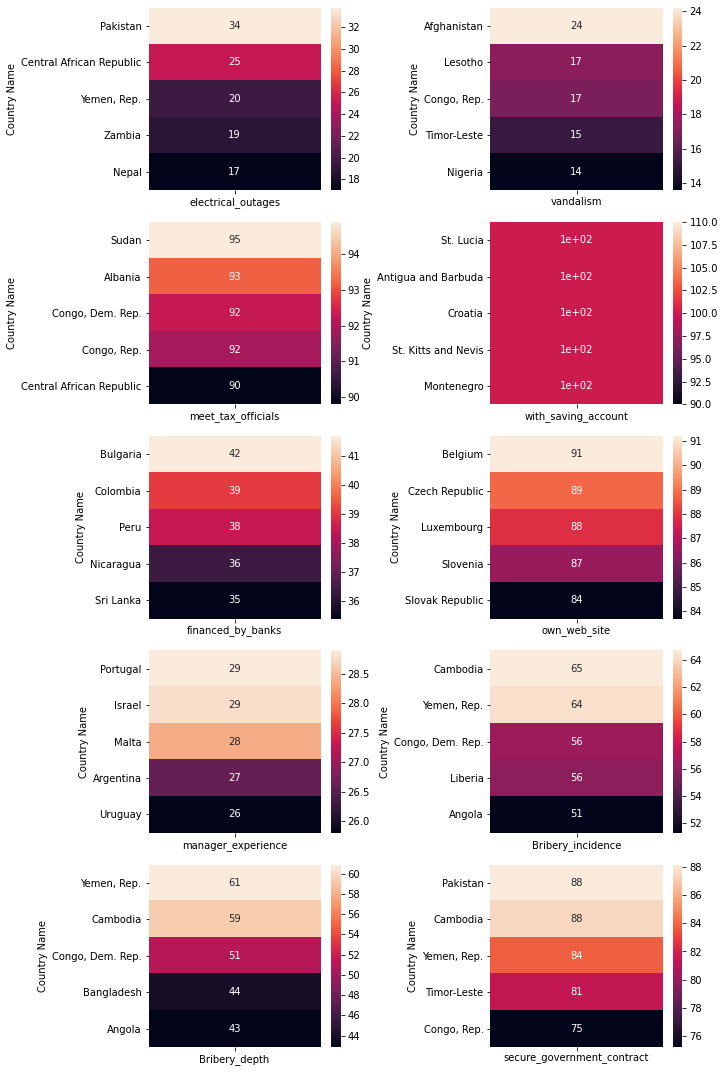

In [40]:
#heatmap for each columns' max five values
fig, axs = plt.subplots(5,2, figsize=(10,15))
row, col = 0, 0
for i in df_wth_female.columns[1:]:
    sns.heatmap(df_wth_female.sort_values(by=i,ascending=False ).head(5)[[i]], ax = axs[row, col], annot=True)
    col += 1
    if col % 2 == 0:
        row += 1
        col = 0
    
plt.tight_layout()

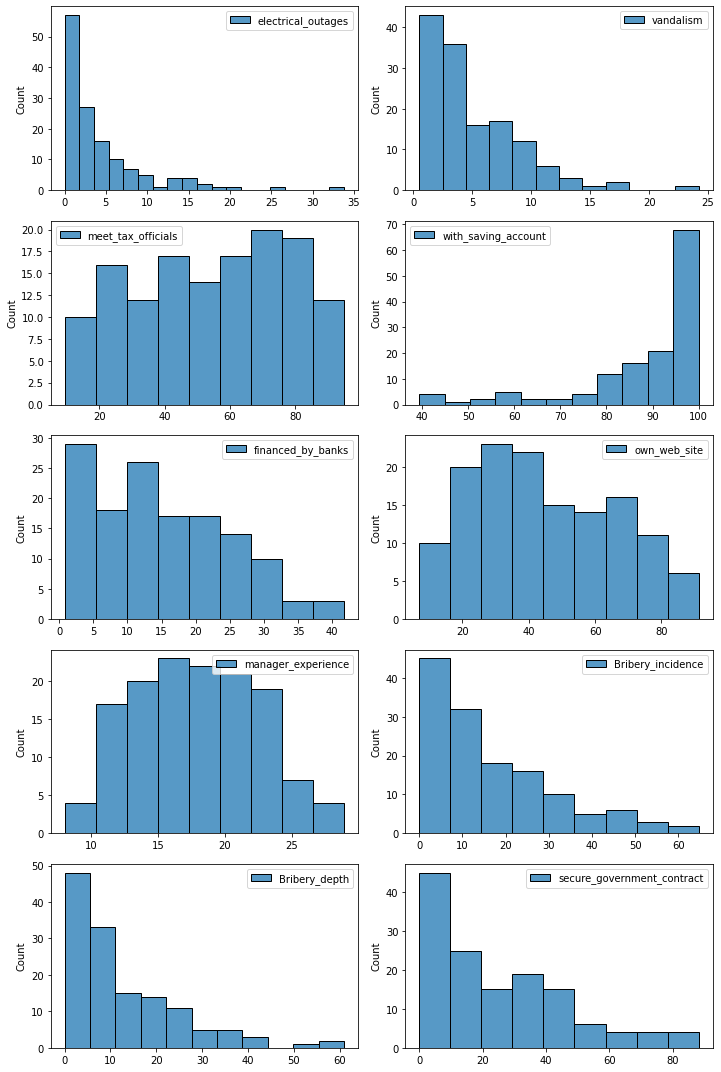

In [41]:
#histogram for each values
fig, axs = plt.subplots(5,2, figsize=(10,15))
row, col = 0, 0
for i in df_wth_female.columns[1:]:
    sns.histplot(df_wth_female[[i]], ax = axs[row, col])
    col += 1
    if col % 2 == 0:
        row += 1
        col = 0
    
plt.tight_layout()

In [42]:
df_m.columns[:len(df_fe.columns)-3]

Index(['Country Name', 'Country Code', 'electrical_outages', 'vandalism',
       'meet_tax_officials', 'with_saving_account', 'financed_by_banks',
       'own_web_site', 'manager_experience'],
      dtype='object')

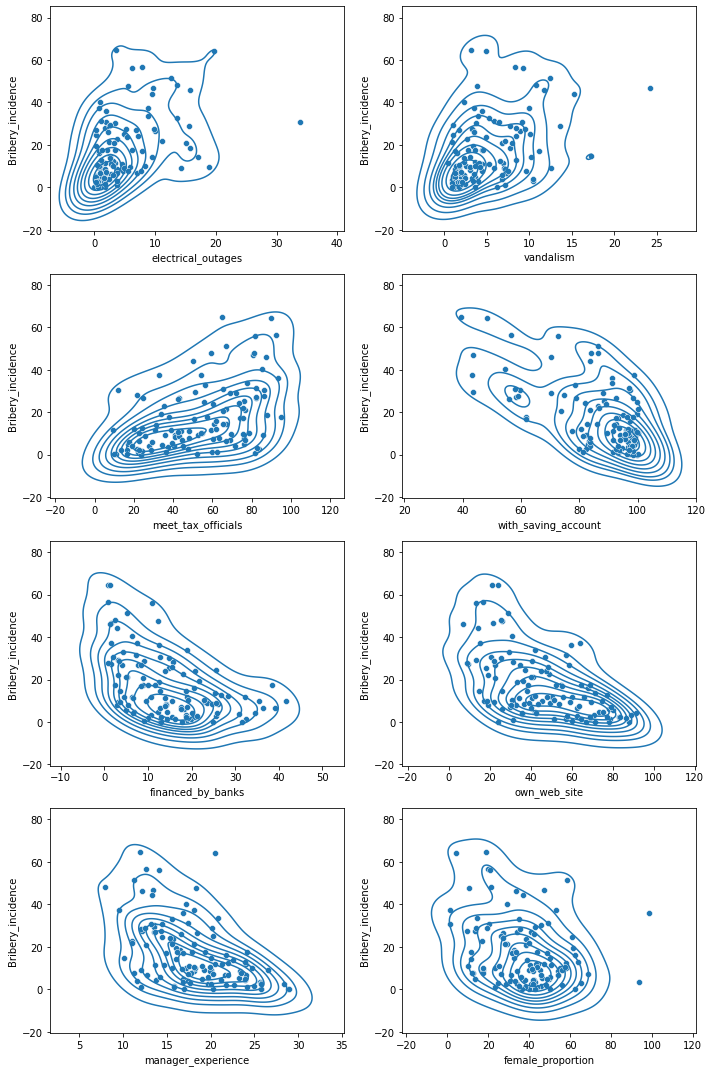

In [43]:
#scatterplot with kde for each values
fig, axs = plt.subplots(4,2, figsize=(10,15))
row, col = 0, 0
for i in df_fe.columns[1:len(df_fe.columns)-3]:
    sns.scatterplot(df_fe[i], df_fe['Bribery_incidence'], ax = axs[row, col] )
    sns.kdeplot(df_fe[i], df_fe['Bribery_incidence'], ax = axs[row, col] )
    col += 1
    if col % 2 == 0:
        row += 1
        col = 0
    
plt.tight_layout()

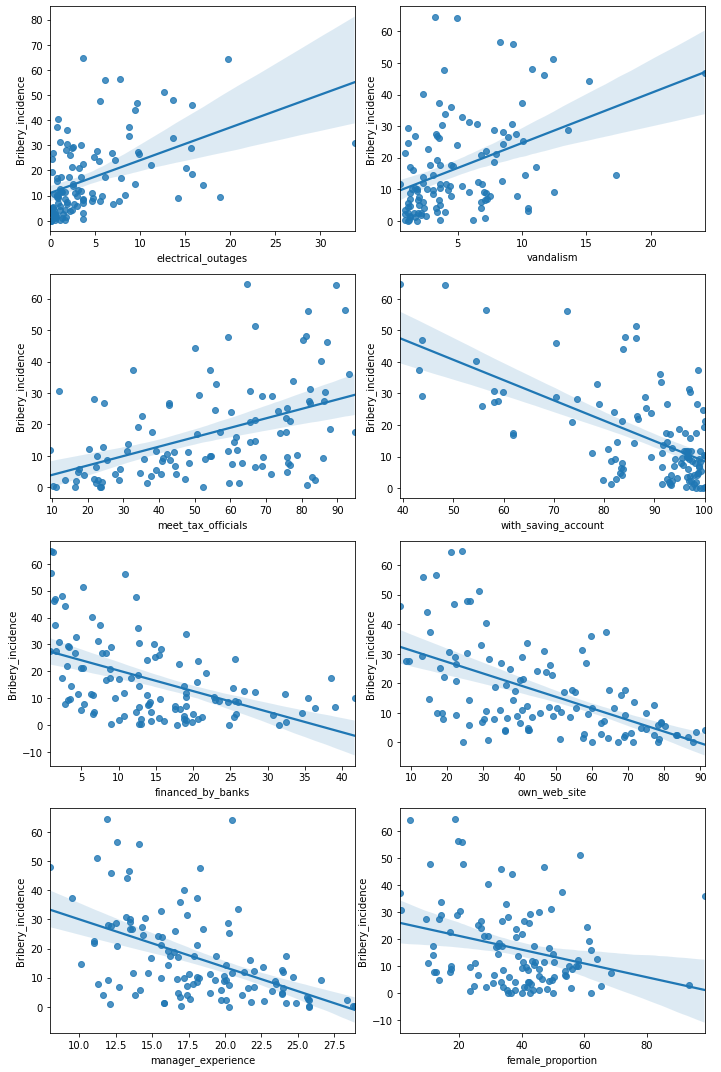

In [44]:
#regression plot for each values having "Bribery_incidence" as dependent variable
fig, axs = plt.subplots(4,2, figsize=(10,15))
row, col = 0, 0
for i in df_fe.columns[1:len(df_fe.columns)-3]:
    sns.regplot(df_fe[i], df_fe['Bribery_incidence'], ax = axs[row, col] )
    col += 1
    if col % 2 == 0:
        row += 1
        col = 0
    
plt.tight_layout()

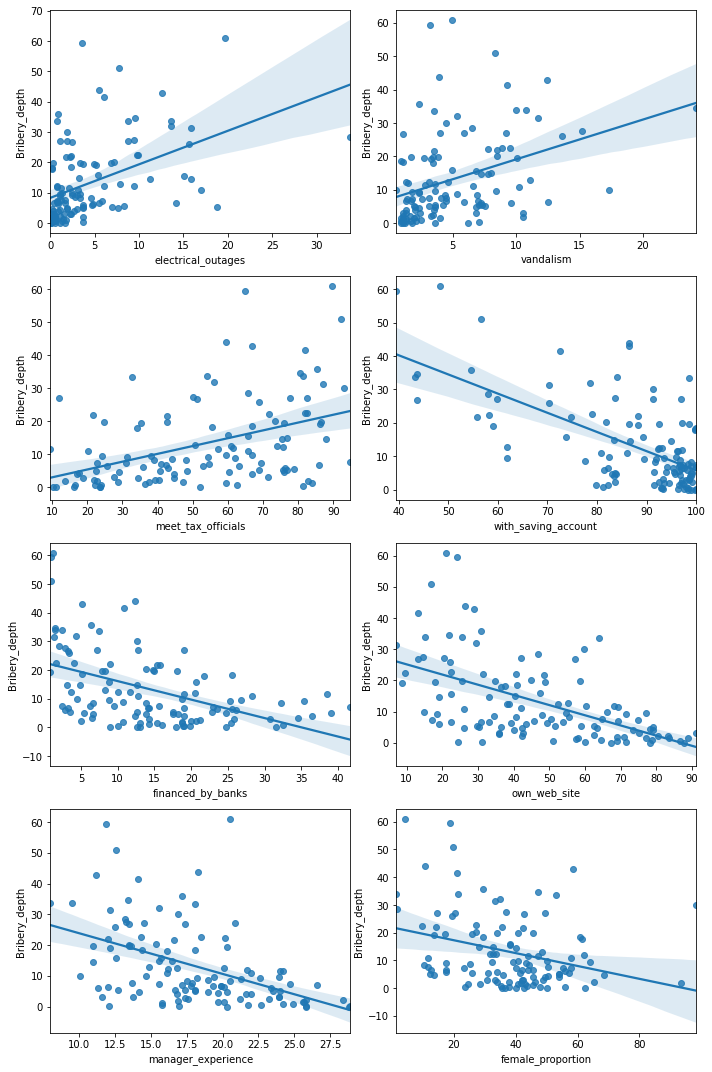

In [45]:
#regression plot for each values having "Bribery_depth" as dependent variable
fig, axs = plt.subplots(4,2, figsize=(10,15))
row, col = 0, 0
for i in df_fe.columns[1:len(df_fe.columns)-3]:
    sns.regplot(df_fe[i], df_fe['Bribery_depth'], ax = axs[row, col] )
    col += 1
    if col % 2 == 0:
        row += 1
        col = 0
    
plt.tight_layout()

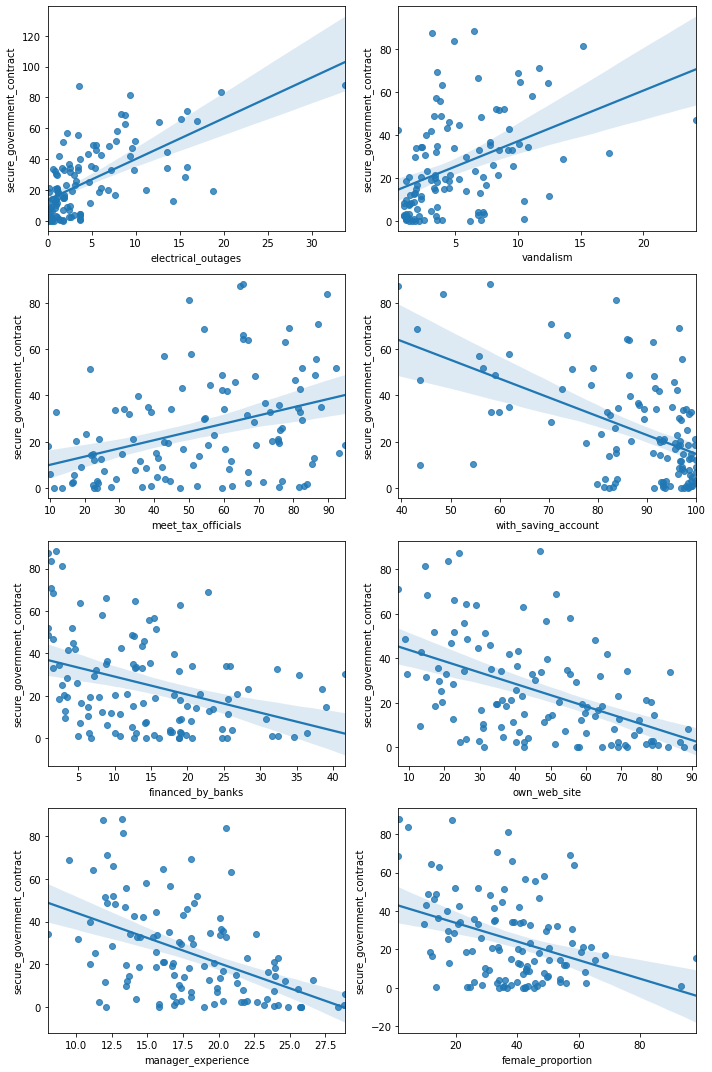

In [46]:
#regression plot for each values having "secure_government_contract" as dependent variable
fig, axs = plt.subplots(4,2, figsize=(10,15))
row, col = 0, 0
for i in df_fe.columns[1:len(df_fe.columns)-3]:
    sns.regplot(df_fe[i], df_fe['secure_government_contract'], ax = axs[row, col] )
    col += 1
    if col % 2 == 0:
        row += 1
        col = 0
    
plt.tight_layout()

In [47]:
#correlation table
df_wth_female.corr()

electrical_outages  vandalism  meet_tax_officials  \
electrical_outages                    1.000000   0.526054            0.456572   
vandalism                             0.526054   1.000000            0.337076   
meet_tax_officials                    0.456572   0.337076            1.000000   
with_saving_account                  -0.371211  -0.384384           -0.245390   
financed_by_banks                    -0.438700  -0.290101           -0.333084   
own_web_site                         -0.397615  -0.471068           -0.476989   
manager_experience                   -0.386395  -0.442200           -0.431221   
Bribery_incidence                     0.455785   0.425717            0.422495   
Bribery_depth                         0.449641   0.381706            0.395282   
secure_government_contract            0.622472   0.434598            0.364913   

                            with_saving_account  financed_by_banks  \
electrical_outages                    -0.371211          -0.438700   
vandalism                             -0.384384          -0.290101   
meet_tax_officials                    -0.245390          -0.333084   
with_saving_account                    1.000000           0.456909   
financed_by_banks                      0.456909           1.000000   
own_web_site                           0.420900           0.286683   
manager_experience                     0.340213           0.427934   
Bribery_incidence                     -0.597173          -0.468668   
Bribery_depth                         -0.634485          -0.469430   
secure_government_contract            -0.525852          -0.396098   

                            own_web_site  manager_experience  \
electrical_outages             -0.397615           -0.386395   
vandalism                      -0.471068           -0.442200   
meet_tax_officials             -0.476989           -0.431221   
with_saving_account             0.420900            0.340213   
financed_by_banks               0.286683            0.427934   
own_web_site                    1.000000            0.646637   
manager_experience              0.646637            1.000000   
Bribery_incidence              -0.505424           -0.476382   
Bribery_depth                  -0.486681           -0.450049   
secure_government_contract     -0.420357           -0.460864   

                            Bribery_incidence  Bribery_depth  \
electrical_outages                   0.455785       0.449641   
vandalism                            0.425717       0.381706   
meet_tax_officials                   0.422495       0.395282   
with_saving_account                 -0.597173      -0.634485   
financed_by_banks                   -0.468668      -0.469430   
own_web_site                        -0.505424      -0.486681   
manager_experience                  -0.476382      -0.450049   
Bribery_incidence                    1.000000       0.981326   
Bribery_depth                        0.981326       1.000000   
secure_government_contract           0.702994       0.694041   

                            secure_government_contract  
electrical_outages                            0.622472  
vandalism                                     0.434598  
meet_tax_officials                            0.364913  
with_saving_account                          -0.525852  
financed_by_banks                            -0.396098  
own_web_site                                 -0.420357  
manager_experience                           -0.460864  
Bribery_incidence                             0.702994  
Bribery_depth                                 0.694041  
secure_government_contract                    1.000000

In [48]:
df_wth_female.columns

Index(['Country Code', 'electrical_outages', 'vandalism', 'meet_tax_officials',
       'with_saving_account', 'financed_by_banks', 'own_web_site',
       'manager_experience', 'Bribery_incidence', 'Bribery_depth',
       'secure_government_contract'],
      dtype='object')

In [49]:
import statsmodels.api as sm

### ols regression results with different variations 

In [50]:
for i in df_wth_female.columns[1:len(df_m.columns)-3]:
    mod = sm.OLS(df_wth_female.Bribery_incidence, df_wth_female[[i]])
    print(mod.fit().summary())
  

                                 OLS Regression Results                                
Dep. Variable:      Bribery_incidence   R-squared (uncentered):                   0.498
Model:                            OLS   Adj. R-squared (uncentered):              0.495
Method:                 Least Squares   F-statistic:                              135.1
Date:                Sat, 08 May 2021   Prob (F-statistic):                    4.10e-22
Time:                        03:14:08   Log-Likelihood:                         -571.42
No. Observations:                 137   AIC:                                      1145.
Df Residuals:                     136   BIC:                                      1148.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1774: RuntimeWarning: divide by zero encountered in double_scalars
  return self.mse_model/self.mse_resid
/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:46: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


In [51]:
mod = sm.OLS(df_wth_female.Bribery_incidence, df_wth_female[['electrical_outages', 'vandalism',
                                                        ]])
print(mod.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Bribery_incidence   R-squared (uncentered):                   0.624
Model:                            OLS   Adj. R-squared (uncentered):              0.618
Method:                 Least Squares   F-statistic:                              111.8
Date:                Sat, 08 May 2021   Prob (F-statistic):                    2.29e-29
Time:                        03:14:09   Log-Likelihood:                         -551.74
No. Observations:                 137   AIC:                                      1107.
Df Residuals:                     135   BIC:                                      1113.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [52]:
mod = sm.OLS(df_wth_female.Bribery_incidence, df_wth_female[['electrical_outages', 'vandalism','meet_tax_officials'
                                                        ]])
print(mod.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Bribery_incidence   R-squared (uncentered):                   0.694
Model:                            OLS   Adj. R-squared (uncentered):              0.687
Method:                 Least Squares   F-statistic:                              101.5
Date:                Sat, 08 May 2021   Prob (F-statistic):                    2.52e-34
Time:                        03:14:09   Log-Likelihood:                         -537.47
No. Observations:                 137   AIC:                                      1081.
Df Residuals:                     134   BIC:                                      1090.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [53]:
mod = sm.OLS(df_wth_female.Bribery_incidence, df_wth_female[['electrical_outages', 'vandalism','meet_tax_officials'
                                                        ,'with_saving_account']])
print(mod.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Bribery_incidence   R-squared (uncentered):                   0.698
Model:                            OLS   Adj. R-squared (uncentered):              0.689
Method:                 Least Squares   F-statistic:                              76.94
Date:                Sat, 08 May 2021   Prob (F-statistic):                    1.18e-33
Time:                        03:14:09   Log-Likelihood:                         -536.59
No. Observations:                 137   AIC:                                      1081.
Df Residuals:                     133   BIC:                                      1093.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [54]:
mod = sm.OLS(df_wth_female.Bribery_incidence, df_wth_female[['electrical_outages', 'vandalism','meet_tax_officials'
                                                        ,'financed_by_banks',]])
print(mod.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Bribery_incidence   R-squared (uncentered):                   0.705
Model:                            OLS   Adj. R-squared (uncentered):              0.696
Method:                 Least Squares   F-statistic:                              79.34
Date:                Sat, 08 May 2021   Prob (F-statistic):                    2.85e-34
Time:                        03:14:09   Log-Likelihood:                         -535.12
No. Observations:                 137   AIC:                                      1078.
Df Residuals:                     133   BIC:                                      1090.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [55]:
mod = sm.OLS(df_wth_female.Bribery_incidence, df_wth_female[['electrical_outages', 'vandalism','meet_tax_officials',
                                                        'financed_by_banks','own_web_site']])

print(mod.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Bribery_incidence   R-squared (uncentered):                   0.705
Model:                            OLS   Adj. R-squared (uncentered):              0.693
Method:                 Least Squares   F-statistic:                              62.99
Date:                Sat, 08 May 2021   Prob (F-statistic):                    2.72e-33
Time:                        03:14:09   Log-Likelihood:                         -535.12
No. Observations:                 137   AIC:                                      1080.
Df Residuals:                     132   BIC:                                      1095.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [56]:
mod = sm.OLS(df_wth_female.Bribery_incidence, df_wth_female[['electrical_outages', 'vandalism','meet_tax_officials',
                                                        'financed_by_banks','manager_experience']])

print(mod.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Bribery_incidence   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.697
Method:                 Least Squares   F-statistic:                              63.90
Date:                Sat, 08 May 2021   Prob (F-statistic):                    1.41e-33
Time:                        03:14:09   Log-Likelihood:                         -534.43
No. Observations:                 137   AIC:                                      1079.
Df Residuals:                     132   BIC:                                      1093.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [57]:
mod = sm.OLS(df_wth_female.Bribery_incidence, df_wth_female[[ 'vandalism','meet_tax_officials',
                                                        'financed_by_banks']])

print(mod.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Bribery_incidence   R-squared (uncentered):                   0.699
Model:                            OLS   Adj. R-squared (uncentered):              0.693
Method:                 Least Squares   F-statistic:                              103.9
Date:                Sat, 08 May 2021   Prob (F-statistic):                    8.48e-35
Time:                        03:14:09   Log-Likelihood:                         -536.36
No. Observations:                 137   AIC:                                      1079.
Df Residuals:                     134   BIC:                                      1087.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [58]:
mod = sm.OLS(df_wth_female.Bribery_incidence, df_wth_female[[ 'electrical_outages','meet_tax_officials',
                                                        'financed_by_banks']])

print(mod.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Bribery_incidence   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.675
Method:                 Least Squares   F-statistic:                              95.81
Date:                Sat, 08 May 2021   Prob (F-statistic):                    3.52e-33
Time:                        03:14:09   Log-Likelihood:                         -540.18
No. Observations:                 137   AIC:                                      1086.
Df Residuals:                     134   BIC:                                      1095.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [59]:
mod = sm.OLS(df_wth_female.Bribery_incidence, df_wth_female[[ 'vandalism','meet_tax_officials',
                                                        'manager_experience']])

print(mod.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Bribery_incidence   R-squared (uncentered):                   0.684
Model:                            OLS   Adj. R-squared (uncentered):              0.677
Method:                 Least Squares   F-statistic:                              96.91
Date:                Sat, 08 May 2021   Prob (F-statistic):                    2.09e-33
Time:                        03:14:09   Log-Likelihood:                         -539.64
No. Observations:                 137   AIC:                                      1085.
Df Residuals:                     134   BIC:                                      1094.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [60]:
mod = sm.OLS(df_wth_female.Bribery_incidence, df_wth_female[[ 'vandalism','meet_tax_officials',
                                                        'own_web_site']])

print(mod.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Bribery_incidence   R-squared (uncentered):                   0.688
Model:                            OLS   Adj. R-squared (uncentered):              0.681
Method:                 Least Squares   F-statistic:                              98.67
Date:                Sat, 08 May 2021   Prob (F-statistic):                    9.14e-34
Time:                        03:14:09   Log-Likelihood:                         -538.80
No. Observations:                 137   AIC:                                      1084.
Df Residuals:                     134   BIC:                                      1092.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [61]:
mod = sm.OLS(df_wth_female.Bribery_incidence, df_wth_female[[ 'vandalism','meet_tax_officials',
                                                        'financed_by_banks']])

print(mod.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Bribery_incidence   R-squared (uncentered):                   0.699
Model:                            OLS   Adj. R-squared (uncentered):              0.693
Method:                 Least Squares   F-statistic:                              103.9
Date:                Sat, 08 May 2021   Prob (F-statistic):                    8.48e-35
Time:                        03:14:09   Log-Likelihood:                         -536.36
No. Observations:                 137   AIC:                                      1079.
Df Residuals:                     134   BIC:                                      1087.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [62]:
mod = sm.OLS(df_fe.Bribery_incidence, df_fe[[ 'vandalism','meet_tax_officials',
                                                        'financed_by_banks']])

print(mod.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Bribery_incidence   R-squared (uncentered):                   0.707
Model:                            OLS   Adj. R-squared (uncentered):              0.700
Method:                 Least Squares   F-statistic:                              91.11
Date:                Sat, 08 May 2021   Prob (F-statistic):                    4.95e-30
Time:                        03:14:10   Log-Likelihood:                         -454.94
No. Observations:                 116   AIC:                                      915.9
Df Residuals:                     113   BIC:                                      924.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [63]:
mod = sm.OLS(df_fe.Bribery_incidence, df_fe[[ 'vandalism','meet_tax_officials',
                                                        'financed_by_banks','female_proportion']])

print(mod.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Bribery_incidence   R-squared (uncentered):                   0.709
Model:                            OLS   Adj. R-squared (uncentered):              0.698
Method:                 Least Squares   F-statistic:                              68.10
Date:                Sat, 08 May 2021   Prob (F-statistic):                    4.14e-29
Time:                        03:14:10   Log-Likelihood:                         -454.71
No. Observations:                 116   AIC:                                      917.4
Df Residuals:                     112   BIC:                                      928.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [64]:
mod = sm.OLS(df_fe.Bribery_incidence, df_fe[[ 'vandalism','meet_tax_officials',
                                                        'female_proportion']])

print(mod.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Bribery_incidence   R-squared (uncentered):                   0.691
Model:                            OLS   Adj. R-squared (uncentered):              0.683
Method:                 Least Squares   F-statistic:                              84.41
Date:                Sat, 08 May 2021   Prob (F-statistic):                    9.97e-29
Time:                        03:14:10   Log-Likelihood:                         -458.03
No. Observations:                 116   AIC:                                      922.1
Df Residuals:                     113   BIC:                                      930.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

### After applying different variations, the best variation that we have

In [65]:
mod = sm.OLS(df_wth_female.Bribery_incidence, df_wth_female[[ 'vandalism','meet_tax_officials',
                                                        'financed_by_banks']])

print(mod.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Bribery_incidence   R-squared (uncentered):                   0.699
Model:                            OLS   Adj. R-squared (uncentered):              0.693
Method:                 Least Squares   F-statistic:                              103.9
Date:                Sat, 08 May 2021   Prob (F-statistic):                    8.48e-35
Time:                        03:14:10   Log-Likelihood:                         -536.36
No. Observations:                 137   AIC:                                      1079.
Df Residuals:                     134   BIC:                                      1087.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [66]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                146 non-null    object 
 1   Country Code                146 non-null    object 
 2   electrical_outages          145 non-null    float64
 3   vandalism                   141 non-null    float64
 4   meet_tax_officials          146 non-null    float64
 5   with_saving_account         145 non-null    float64
 6   financed_by_banks           146 non-null    float64
 7   own_web_site                146 non-null    float64
 8   manager_experience          143 non-null    float64
 9   female_proportion           123 non-null    float64
 10  Bribery_incidence           146 non-null    float64
 11  Bribery_depth               146 non-null    float64
 12  secure_government_contract  145 non-null    float64
dtypes: float64(11), object(2)
memory us

In [67]:
#subsetting dataframe according to ols regression model results
df_last = df_m[['Country Name','Country Code','vandalism','meet_tax_officials','financed_by_banks','Bribery_incidence' ]]

In [68]:
df_last.dropna(inplace=True)
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 145
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country Name        141 non-null    object 
 1   Country Code        141 non-null    object 
 2   vandalism           141 non-null    float64
 3   meet_tax_officials  141 non-null    float64
 4   financed_by_banks   141 non-null    float64
 5   Bribery_incidence   141 non-null    float64
dtypes: float64(4), object(2)
memory usage: 7.7+ KB


/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [70]:
#splitting data
X, y = df_last[['vandalism','meet_tax_officials','financed_by_banks']], df_last[['Bribery_incidence']]

In [71]:
#splitting data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=45 )

In [72]:
#training the model
model = LinearRegression()

In [73]:
#fitting the model
model.fit(X_train,y_train)

LinearRegression()

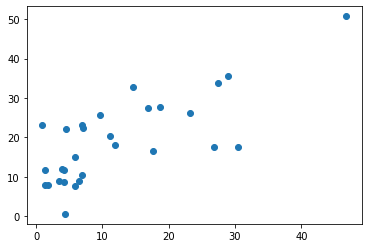

In [74]:
#scatter of predicted an actual values
plt.scatter(y_test,model.predict(X_test))

In [75]:
#histogram for residuals
sns.distplot((y_test-model.predict(X_test)), bins=10)

<AxesSubplot:ylabel='Density'>

### According to scatter plot and residuals histogram, our model is doing good job!!!

In [76]:
from sklearn import metrics

In [77]:
#standard errors
print('MAE:', metrics.mean_absolute_error(y_test,model.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test,model.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,model.predict(X_test))))

MAE: 8.719062903065474
MSE: 105.06662832499782
RMSE: 10.250201379728978


In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
model_rf = RandomForestRegressor(n_estimators = 600 )

In [80]:
#training the model
model_rf.fit(X_train,y_train)

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(n_estimators=600)

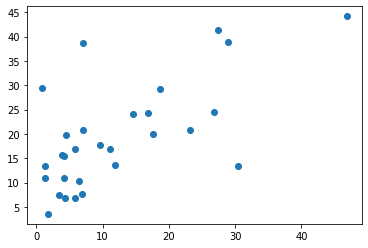

In [81]:
#scatter of predicted an actual values 
plt.scatter(y_test,model_rf.predict(X_test))

<AxesSubplot:xlabel='Bribery_incidence', ylabel='Density'>

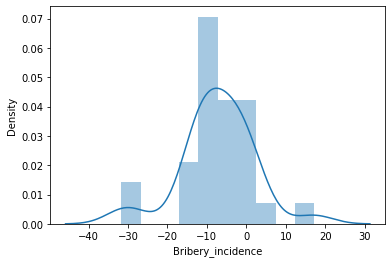

In [82]:
#histogram for residuals
sns.distplot((y_test.Bribery_incidence - model_rf.predict(X_test)), bins=10)

In [83]:
print('MAE:', metrics.mean_absolute_error(y_test,model_rf.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test,model_rf.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,model_rf.predict(X_test))))

MAE: 8.95331034482757
MSE: 135.6484157471258
RMSE: 11.646819984318714


In [84]:
#comparison of two methods
pd.DataFrame(index=X.columns, data=(zip(model_rf.feature_importances_, model.coef_[0])), columns=['randomForest','Linear'])

randomForest    Linear
vandalism               0.268200  1.173236
meet_tax_officials      0.264463  0.160319
financed_by_banks       0.467337 -0.439233

In [85]:
df_m.columns

Index(['Country Name', 'Country Code', 'electrical_outages', 'vandalism',
       'meet_tax_officials', 'with_saving_account', 'financed_by_banks',
       'own_web_site', 'manager_experience', 'female_proportion',
       'Bribery_incidence', 'Bribery_depth', 'secure_government_contract'],
      dtype='object')

In [86]:
#applyign Random Forest one more time with all columns 
xl = ['electrical_outages', 'vandalism',
       'meet_tax_officials', 'with_saving_account', 'financed_by_banks',
       'own_web_site', 'manager_experience', 'female_proportion','Bribery_incidence']
X, y = df_m[xl].dropna().drop('Bribery_incidence',1), df_m[xl].dropna()['Bribery_incidence']
X_train_t,X_test_t,y_train_t,y_test_t = train_test_split(X, y, test_size=0.2,random_state=45 )
model_rf = RandomForestRegressor(n_estimators = 600 )
model_rf.fit(X_train_t,y_train_t)

RandomForestRegressor(n_estimators=600)

In [87]:
#scatter of predicted an actual values 
plt.scatter(y_test_t,model_rf.predict(X_test_t))

In [88]:
#feature of importance for the model
pd.DataFrame(index=X.columns, data=(model_rf.feature_importances_), columns=['randomForest'])

randomForest
electrical_outages       0.093415
vandalism                0.057022
meet_tax_officials       0.110643
with_saving_account      0.288906
financed_by_banks        0.163922
own_web_site             0.148869
manager_experience       0.069946
female_proportion        0.067277

In [89]:
#applying ols regression according to feature of importnace results of random forest model
xl = [ 'meet_tax_officials', 'with_saving_account', 'financed_by_banks',
       'own_web_site','Bribery_incidence']
X, y = df_m[xl].dropna().drop('Bribery_incidence',1), df_m[xl].dropna()['Bribery_incidence']
mod = sm.OLS(y, X)

print(mod.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Bribery_incidence   R-squared (uncentered):                   0.654
Model:                            OLS   Adj. R-squared (uncentered):              0.645
Method:                 Least Squares   F-statistic:                              66.75
Date:                Sat, 08 May 2021   Prob (F-statistic):                    1.39e-31
Time:                        03:14:23   Log-Likelihood:                         -574.72
No. Observations:                 145   AIC:                                      1157.
Df Residuals:                     141   BIC:                                      1169.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### it seems that the application of  multi correlation is different for random forest than linear regression

### the sample size might be also an important aspect for random forest model

In [90]:
#splitting the data
X, y = df_last[['vandalism','meet_tax_officials','financed_by_banks']], df_last[['Bribery_incidence']]

In [91]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()

Text(0.5, 1.0, 'Elbow Method')

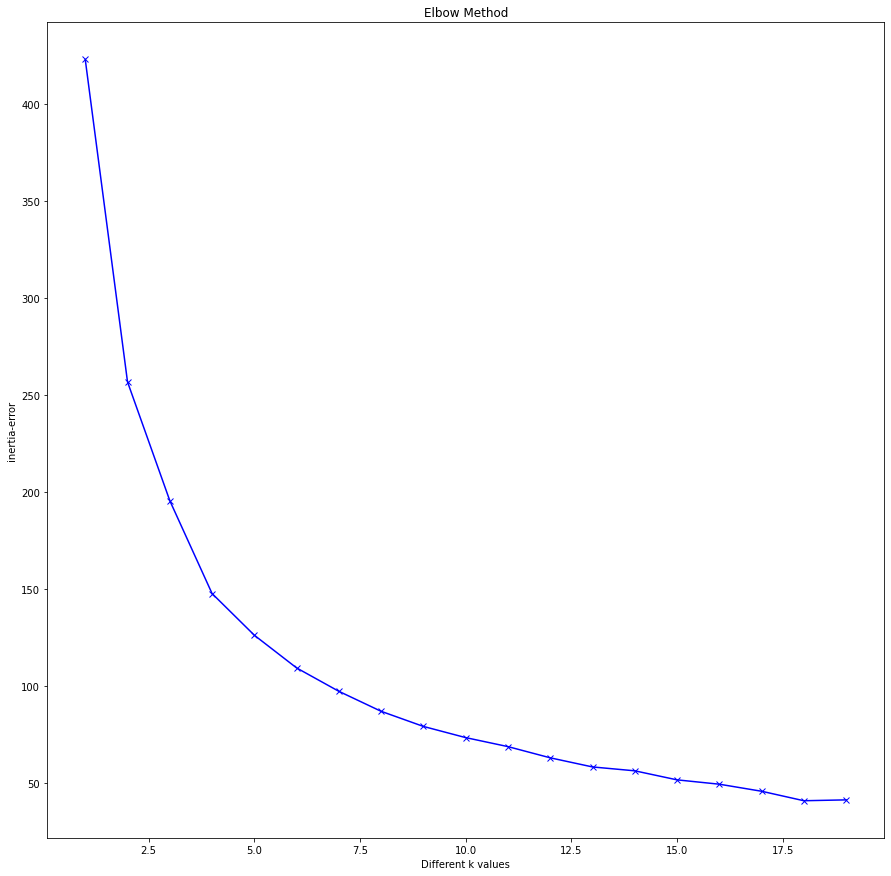

In [93]:
#clustering dataset based on epxlanatory variables for "Bribery_incidence"
#using elbow method to chose number of cluster
plt.figure(figsize=(15,15))
ssd = []

K = range(1,20)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(scaler.fit_transform(X))
    ssd.append(model.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")

In [94]:
from yellowbrick.cluster import KElbowVisualizer

In [95]:
#using elbow method to chose number of cluster
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

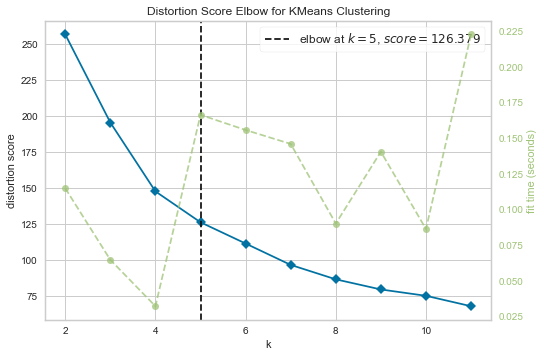

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [96]:
#using elbow method to chose number of cluster as starting with 2 clusters
visualizer.fit(scaler.fit_transform(X))       
visualizer.show()

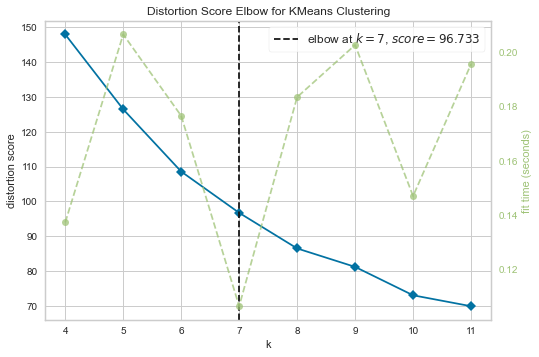

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [97]:
#using elbow method to chose number of cluster as starting with 4 clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(scaler.fit_transform(X))       
visualizer.show()

In [98]:
#dividing dataset into 5 clusters
model_5 = KMeans(n_clusters=5)
model_5.fit(scaler.fit_transform(X))

KMeans(n_clusters=5)

In [99]:
#dividing dataset into 7 clusters
model_7 = KMeans(n_clusters=7)
model_7.fit(scaler.fit_transform(X))

KMeans(n_clusters=7)

In [100]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [101]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                146 non-null    object 
 1   Country Code                146 non-null    object 
 2   electrical_outages          145 non-null    float64
 3   vandalism                   141 non-null    float64
 4   meet_tax_officials          146 non-null    float64
 5   with_saving_account         145 non-null    float64
 6   financed_by_banks           146 non-null    float64
 7   own_web_site                146 non-null    float64
 8   manager_experience          143 non-null    float64
 9   female_proportion           123 non-null    float64
 10  Bribery_incidence           146 non-null    float64
 11  Bribery_depth               146 non-null    float64
 12  secure_government_contract  145 non-null    float64
dtypes: float64(11), object(2)
memory us

In [102]:
#prepration of world map to show "Bribery incidence" around the world
data = dict(
        type = 'choropleth',
        locations = df_m['Country Code'],
        z = df_m['Bribery_incidence'],
        text = df_m['Country Name'],
        colorbar = {'title' : 'Bribery incidence'},
      ) 

In [103]:
#prepration of world map to show "Bribery incidence" around the world
layout = dict(
    title = 'Bribery incidence',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

In [104]:
choromap = go.Figure(data = [data],layout = layout)

In [105]:
iplot(choromap)

In [106]:
df_last['k5'] = model_5.labels_
df_last['k7'] = model_7.labels_

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 145
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country Name        141 non-null    object 
 1   Country Code        141 non-null    object 
 2   vandalism           141 non-null    float64
 3   meet_tax_officials  141 non-null    float64
 4   financed_by_banks   141 non-null    float64
 5   Bribery_incidence   141 non-null    float64
 6   k5                  141 non-null    int32  
 7   k7                  141 non-null    int32  
dtypes: float64(4), int32(2), object(2)
memory usage: 8.8+ KB


In [108]:
#showing distribution of 5 clusters in the world
data = dict(
        type = 'choropleth',
        locations = df_last['Country Code'],
        z = df_last['k5'],
        text = df_last['Country Name'],
        colorbar = {'title' : 'Cluster 1'},
      ) 
layout = dict(
    title = 'Cluster 1',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

choromap = go.Figure(data = [data],layout = layout)

iplot(choromap)

In [109]:
#showing distribution of 7 clusters in the world
data = dict(
        type = 'choropleth',
        locations = df_last['Country Code'],
        z = df_last['k7'],
        text = df_last['Country Name'],
        colorbar = {'title' : 'Cluster 2'},
      ) 
layout = dict(
    title = 'Cluster 2',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

choromap = go.Figure(data = [data],layout = layout)

iplot(choromap)